## Feed-forward Neural Network for Binary Classification
### The network consist of 2 neurons (2 feature dimensions) at input layer, 3 neurons at hidden layer and 1 neuron at output layer. The network is trained using backpropagation algorithm.

### Binary Cross Entropy Loss with Logits (torch.nn.BCEWithLogitsLoss)
#### Logistic Predictied Probability<br> $p(y|\mathbf{x})=\sigma \Big(\mathbf{w}_2^T \left(\sigma (\mathsf{W}_1^T\mathbf{x}+\mathbf{b}_1)\right)+b_2\Big)$
#### Binary Cross Entropy Loss <br> $L(\mathbf{x}|y)=-y\log(p(y|\mathbf{x}))-(1-y)\log(1-p(y|\mathbf{x}))$

where $y\in\{0, 1\},$ $\mathsf{W}_1\in\mathbb{R}^{2\times 3}$ and $\mathbf{w}_2\in\mathbb{R}^{3\times 1}$ are the weights, $\mathbf{b}_1 \in\mathbb{R}^{3\times 1}$ and $b_2 \in \mathbb{R}^{1\times 1}$ are the biases. The activation function is the logistic sigmoid function.

Furthermore, assume $\mathsf{X} = (\mathbf{x}^{(0)}, ..., \mathbf{x}^{(n-1)})^T$, $\mathbf{y} = ({y}^{(0)}, ..., {y}^{(n-1)})^T$, $\mathsf{H} = (\mathbf{h}^{(0)}, ..., \mathbf{h}^{(n-1)})^T$, $\mathbf{p} = ({p}^{(0)}, ..., {p}^{(n-1)})^T$,  we can compute the $\frac{\partial \mathcal{L}_
\text{train}}{\partial \mathbf{w}_2}$, $\frac{\partial \mathcal{L}_
\text{train}}{\partial b_2}$, $\frac{\partial \mathcal{L}_\text{train}}{\partial \mathsf{H}}$, $\frac{\partial \mathcal{L}_
\text{train}}{\partial \mathsf{W}_1}$ and $\frac{\partial \mathcal{L}_\text{train}}{\partial \mathbf{b}_1}$ in a vectorized form (assume $\mathbf{1} \in \mathbb{R}^{n\times 1}$ is a $n$-dimenional vector where each entry is 1):

1. $\displaystyle\frac{\partial \mathcal{L}_\text{train}} {\partial \mathbf{w}_2} = \mathsf{H}^T \big(
    \mathbf{p}-\mathbf{y}\big)$.
2. $\displaystyle\frac{\partial \mathcal{L}_\text{train}} {\partial {b}_2} = \mathbf{1}^T\big(
    \mathbf{p}-\mathbf{y}\big) $.
3. $\displaystyle\frac{\partial \mathcal{L}_\text{train}} {\partial \mathsf{H}} = \big(
    \mathbf{p}-\mathbf{y}\big) \mathbf{w}_2^T$ .
4. $\displaystyle\frac{\partial \mathcal{L}_\text{train}} {\partial \mathsf{W}_1} = \mathsf{X}^T\bigg(\big(\frac{\partial \mathcal{L}_\text{train}}{\partial \mathsf{H}}\big)\circ \mathsf{H}\circ (1-\mathsf{H})\bigg)$.
5. $\displaystyle\frac{\partial \mathcal{L}_\text{train}} {\partial 
    \mathbf{b}_1} = \bigg(\big(\frac{\partial \mathcal{L}_\text{train}}{\partial \mathsf{H}}\big)\circ \mathsf{H}\circ (1-\mathsf{H})\bigg)^T \mathbf{1}$.


#### Load Data

In [322]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load original Iris dataset.
iris = datasets.load_iris()
old_X = iris.data
old_Y = iris.target

print("old_X.shape:", old_X.shape)
print("old_Y.shape:", old_Y.shape)

# Create the modified Iris dataset.
new_X = old_X[old_Y>0][:,2:]            # We only use last 2 features.
new_Y = old_Y[old_Y>0].reshape(-1,1)    # Use class 1,2 and convert 
new_Y[new_Y==1] = 0                    # them into class 0,1.
new_Y[new_Y==2] = 1        

print("new_X.shape:", new_X.shape)
print("new_Y.shape:", new_Y.shape)

# Generate training set and test set.
X_train =      np.vstack([new_X[:35],   new_X[50:85]])  # Shape: [70,2].
Y_train = np.concatenate([new_Y[:35],   new_Y[50:85]])  # Shape: [70,1].
X_test  =      np.vstack([new_X[35:50], new_X[85:100]]) # Shape: [30,2].
Y_test  = np.concatenate([new_Y[35:50], new_Y[85:100]]) # Shape: [30,1].

# X_train.shape should be (70,2), which shows 
# 70 training points where each has 2 features.
print("X_train.shape:", X_train.shape)     

# Y_train.shape should be (70,1) which shows 70 
# points where each point has label 0, 1.
print("Y_train.shape:", Y_train.shape)     

# check what are the labels in Y_train.
print("classes of label:", np.unique(Y_train))

old_X.shape: (150, 4)
old_Y.shape: (150,)
new_X.shape: (100, 2)
new_Y.shape: (100, 1)
X_train.shape: (70, 2)
Y_train.shape: (70, 1)
classes of label: [0 1]


#### Visualization of Original Data

In [323]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import math
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.utils import shuffle
import scipy.io as sio
plt.rcParams['figure.figsize'] = 8,8

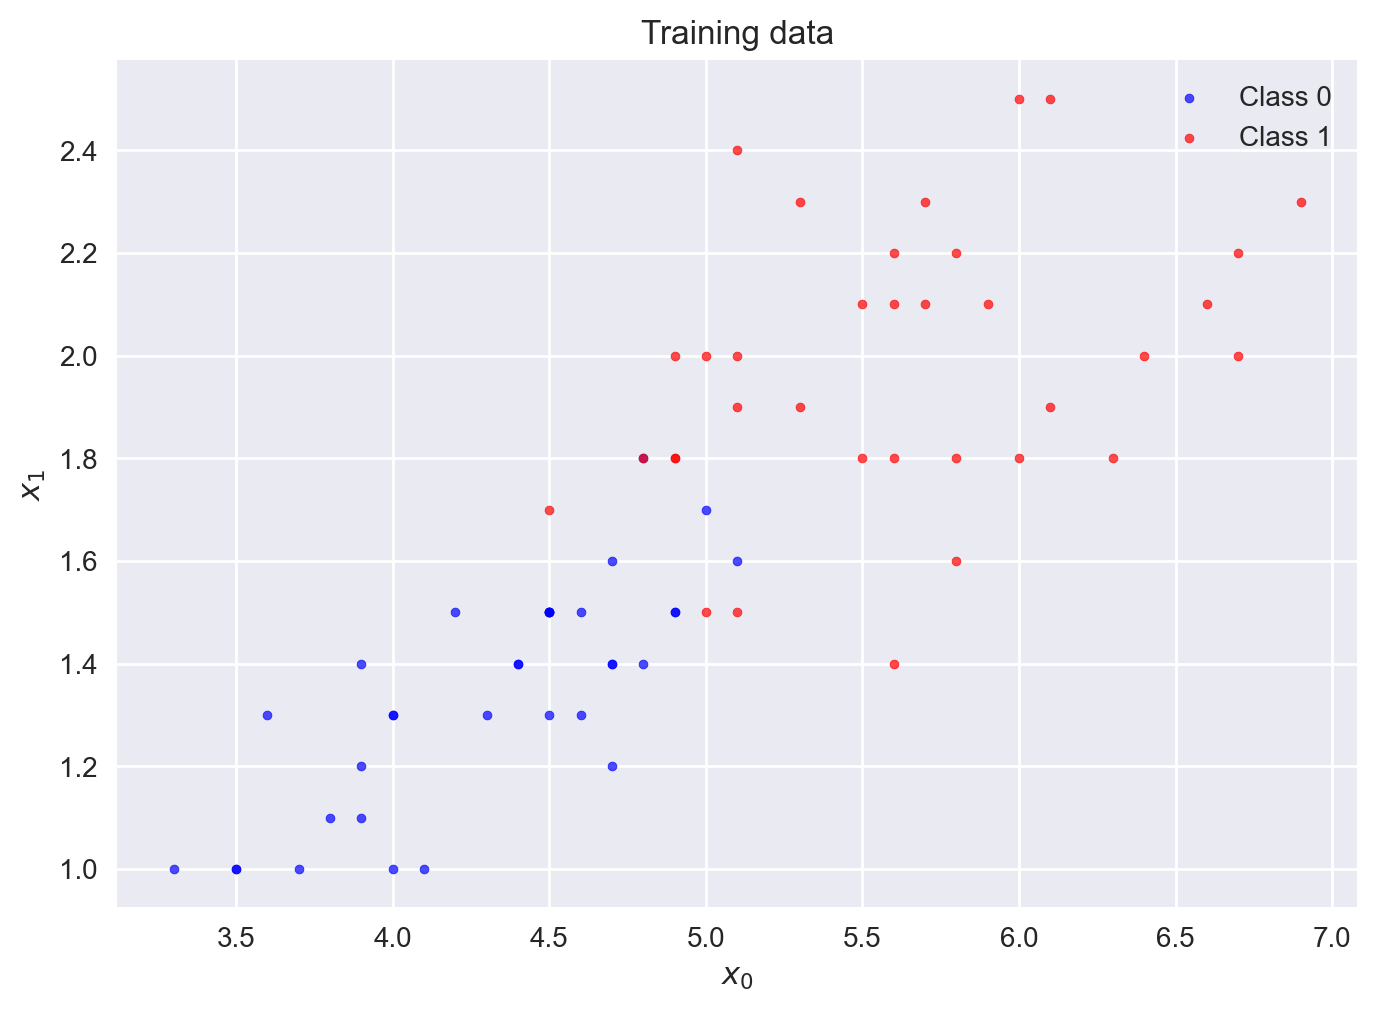

In [324]:
# Visualization of the training data.
plt.style.use("seaborn-v0_8")

fig = plt.figure()
plt.scatter(X_train[Y_train[:,0]==0, 0], 
            X_train[Y_train[:,0]==0, 1], 
            marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_train[Y_train[:,0]==+1, 0], 
            X_train[Y_train[:,0]==+1, 1], 
            marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend(loc='upper right', fontsize=10)
plt.title('Training data')
plt.show()

#### Training Procedure

In [325]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [326]:
# Gradient of loss function: L'(W1, b1, W2, b2).
def L_prime(X, Y, W1, b1, W2, b2):
    """ L'(W,b) function. 
    X:  Feature matrix.    Shape: [n,2].
    Y:  Label vector.      Shape: [n,1].
    W1: Weight matrix W1.  Shape: [2,3].
    b1: Bias vector b1.    Shape: [3,1].
    W2: Weight matrix W2.  Shape: [3,1].
    b2: Bias vector b2.    Shape: [1,1].
    Return the gradients: dL/dW1 (Shape: [2,3]), dL/db1 (Shape: [3,1]),
                          dL/dW2 (Shape: [3,1]), dL/db2 (Shape: [1,1]).
    """
    # Get dimensions.
    n = X.shape[0]
    
    ####### Begin your code ######
    ## Calculate feed-forward values.
    H = sigmoid(X.dot(W1) + b1.T)                          # Shape: [n, 3].
    P = sigmoid((H.dot(W2) + b2.T))                            # Shape: [n, 1].
    
    ## Calculate the gradients: dL/dW1, dL/db1, dL/dW2, dL/db2.
    dL_by_dW2 = H.T.dot((P - Y))                             # Shape: [3,1].
    dL_by_db2 = np.ones([1, n]).dot(P - Y)                             # Shape: [1,1].
    dL_by_dH  = (P - Y).dot(W2.T)                             # Shape: [n,3].
    
    dL_by_dW1  = X.T.dot(dL_by_dH * (1 - H) * H)                            # Shape: [2,3].
    dL_by_db1  = (dL_by_dH * (1 - H) * H).T.dot(np.ones([n, 1]))                            # Shape: [3,1].
    ####### End your code ########
    
    # Return the gradients.
    return dL_by_dW1, dL_by_db1, dL_by_dW2, dL_by_db2

In [327]:
def L(X, Y, W1, b1, W2, b2):
    """ L(W,b) function. 
    X:  Feature matrix.    Shape: [n,2].
    Y:  Label vector.      Shape: [n,1].
    W1: Weight matrix W1.  Shape: [2,3].
    b1: Bias vector b1.    Shape: [3,1].
    W2: Weight matrix W2.  Shape: [3,1].
    b2: Bias vector b2.    Shape: [1,1].
    Return the loss.       Shape: Scalar.
    """
    # Get dimensions.
    n = X.shape[0]
    
    ####### Begin your code ######
    ## Calculate feed-forward values.
    H = sigmoid(X.dot(W1) + b1.T)                            # Shape: [n, 3].
    P = sigmoid((H.dot(W2) + b2.T))                            # Shape: [n, 1].
    
    
    
    epsilon = 1e-15
    P_clipped = np.clip(P, epsilon, 1 - epsilon)
    ## Get the loss.
    L = -np.sum(Y * P + (1 - Y) * np.log(1 - P_clipped))                        # Shape: Scalar.
    
    ####### End your code ########
    
    return L

#### Fixed Initialization

In [378]:
## The following codes might take a while to run, please be patient
learning_rate = 0.00025
n_iter = 1000000                        # Number of iterations

np.random.seed(0)
W1 = np.random.randn(2,3)/((2*3)**2)   # Weight matrix 1.
b1 = np.random.randn(3,1)/((3*1)**2)   # Bias vector 1.
W2 = np.random.randn(3,1)/((3*1)**2)   # Weight matrix 2.
b2 = np.random.randn(1,1)/((1*1)**2)   # Bias vector 2.

#### Xavier Initilization

In [328]:
def init_weight_bias_xavier(state_id=0):
    np.random.seed(state_id)
    W1 = np.random.randn(2,3) / np.sqrt(2)   # Weight matrix 1.
    b1 = np.zeros([3,1])  # Bias vector 1.
    W2 = np.random.randn(3,1) / np.sqrt(3)   # Weight matrix 2.
    b2 = np.zeros([1,1])   # Bias vector 2.
    return W1, b1, W2, b2

#### Training Function
Including batch_size parameter to enable stochastic gradient descent

In [382]:
import random
def fit(X_train, Y_train, W1, b1, W2, b2, n_iter, learning_rate, batch_size=None):
    # We will keep track of training loss over iterations.
    iterations = [0]
    print(L(X_train, Y_train, W1, b1, W2, b2))
    L_list = [L(X_train, Y_train, W1, b1, W2, b2)]
    
    X_and_Y_train = np.hstack((X_train, Y_train))
    
    for i in range(n_iter):
        ####### Begin your code ######
        
        # initialize batch before if statement to have access
        batch_X_train = X_train.copy()
        batch_Y_train = Y_train.copy()
        
        # if option is given, do training in mini-batch
        if batch_size is not None:
            batch = np.array(random.choices(X_and_Y_train, k=batch_size))
            batch_X_train = batch[:,0:2]
            batch_Y_train = batch[:,2].reshape(-1,1)  
        
        ## Calculate current gradients
        gradient_W1, gradient_b1, gradient_W2, gradient_b2 = L_prime(batch_X_train, batch_Y_train, W1, b1, W2, b2)
                
        ## Perform gradient descent
        W1_new = W1 - learning_rate * gradient_W1
        b1_new = b1 - learning_rate * gradient_b1
        W2_new = W2 - learning_rate * gradient_W2
        b2_new = b2 - learning_rate * gradient_b2
        ####### End your code ########
        
        iterations.append(i+1)
        L_list.append(L(X_train, Y_train, W1_new, b1_new, W2_new, b2_new))
        
        # L1-norm of weight/bias changing.
        norm = np.abs(W1_new-W1).sum() + np.abs(b1_new-b1).sum() + \
            np.abs(W2_new-W2).sum() + np.abs(b2_new-b2).sum() 
        
        if i%40000 == 0 or i+1 == n_iter:
            print('i: {:6d} L: {:.3f} norm:{:.6f}'.format(i, L_list[-1], norm))
            
        W1 = W1_new
        b1 = b1_new
        W2 = W2_new
        b2 = b2_new
        
    print ('W1 matrix: \n' + str(W1))
    print ('b1 vector: \n' + str(b1))
    print ('W2 matrix: \n' + str(W2))
    print ('b2 vector: \n' + str(b2))
    return W1, b1, W2, b2, iterations, L_list


In [388]:
W1, b1, W2, b2 = init_weight_bias_xavier(0)
W1, b1, W2, b2, iterations, L_list = fit(X_train, Y_train, W1, b1, W2, b2, 
                                         n_iter = 2000000, learning_rate = 0.0015, batch_size=20)

11.198836944822752
i:      0 L: 10.927 norm:0.023314
i:  40000 L: -26.629 norm:0.040605
i:  80000 L: -27.664 norm:0.016961
i: 120000 L: -26.867 norm:0.027346
i: 160000 L: -27.528 norm:0.003237
i: 200000 L: -26.672 norm:0.099771
i: 240000 L: -26.869 norm:0.025867
i: 280000 L: -27.752 norm:0.070069
i: 320000 L: -25.682 norm:0.046445
i: 360000 L: -26.393 norm:0.016411
i: 400000 L: -27.494 norm:0.030614
i: 440000 L: -27.282 norm:0.003133
i: 480000 L: -25.816 norm:0.108345
i: 520000 L: -29.508 norm:0.048413
i: 560000 L: -29.651 norm:0.074018
i: 600000 L: -29.810 norm:0.051383
i: 640000 L: -30.197 norm:0.047094
i: 680000 L: -30.249 norm:0.028626
i: 720000 L: -30.278 norm:0.010038
i: 760000 L: -30.145 norm:0.007245
i: 800000 L: -29.711 norm:0.038338
i: 840000 L: -30.172 norm:0.005866
i: 880000 L: -30.502 norm:0.013031
i: 920000 L: -30.567 norm:0.019269
i: 960000 L: -30.137 norm:0.037162
i: 1000000 L: -30.329 norm:0.066987
i: 1040000 L: -30.383 norm:0.042264
i: 1080000 L: -30.319 norm:0.054484

#### Training Loss Curve

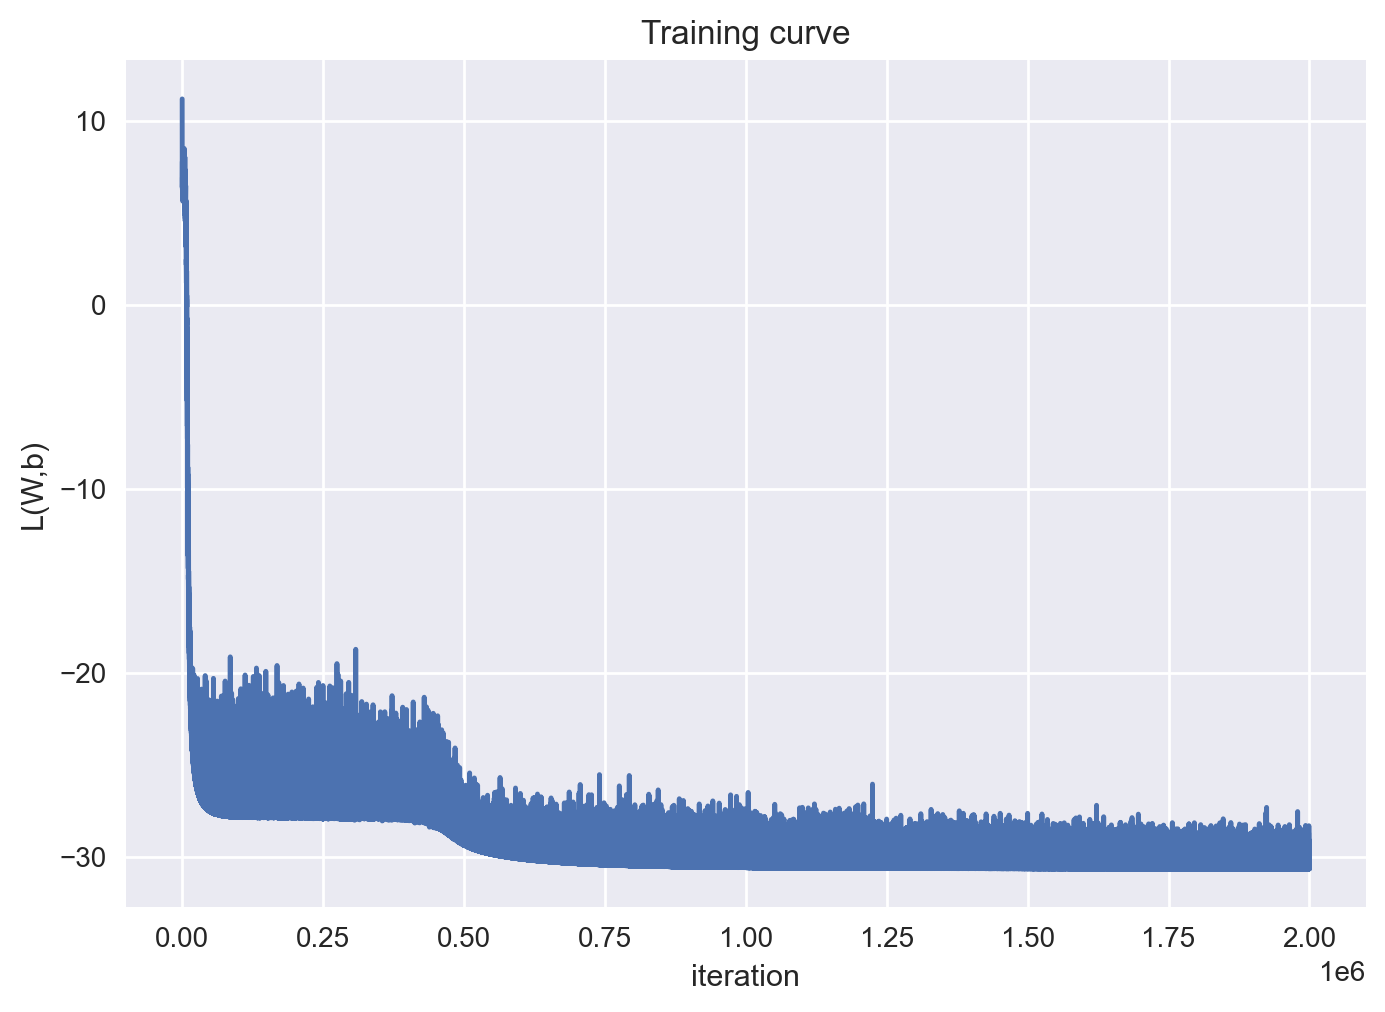

In [389]:
plt.title('Training curve')
plt.xlabel('iteration')
plt.ylabel('L(W,b)')
# plt.semilogy(iterations, np.array(L_list).reshape(-1, 1))
plt.plot(iterations, L_list) 
plt.show()

#### Results on Training Data

In [390]:
# Prepare for decision boundary.
num = 100
X0_plane_range = np.linspace(1,7,num)
X1_plane_range = np.linspace(0,2.5,num)
X0_plane, X1_plane = np.meshgrid(X0_plane_range, X1_plane_range)
X_decision = np.stack([X0_plane.reshape(-1), X1_plane.reshape(-1)]).T

# Calculate feed-forward values.
f_decision = sigmoid(X_decision.dot(W1)+b1.T).dot(W2)+b2.T # Shape: [n,1].
yhat_decision = np.ones_like(f_decision)  # Define yhat_decision as an array of ones with the same shape as f_decision.
yhat_decision[f_decision<0] = 0

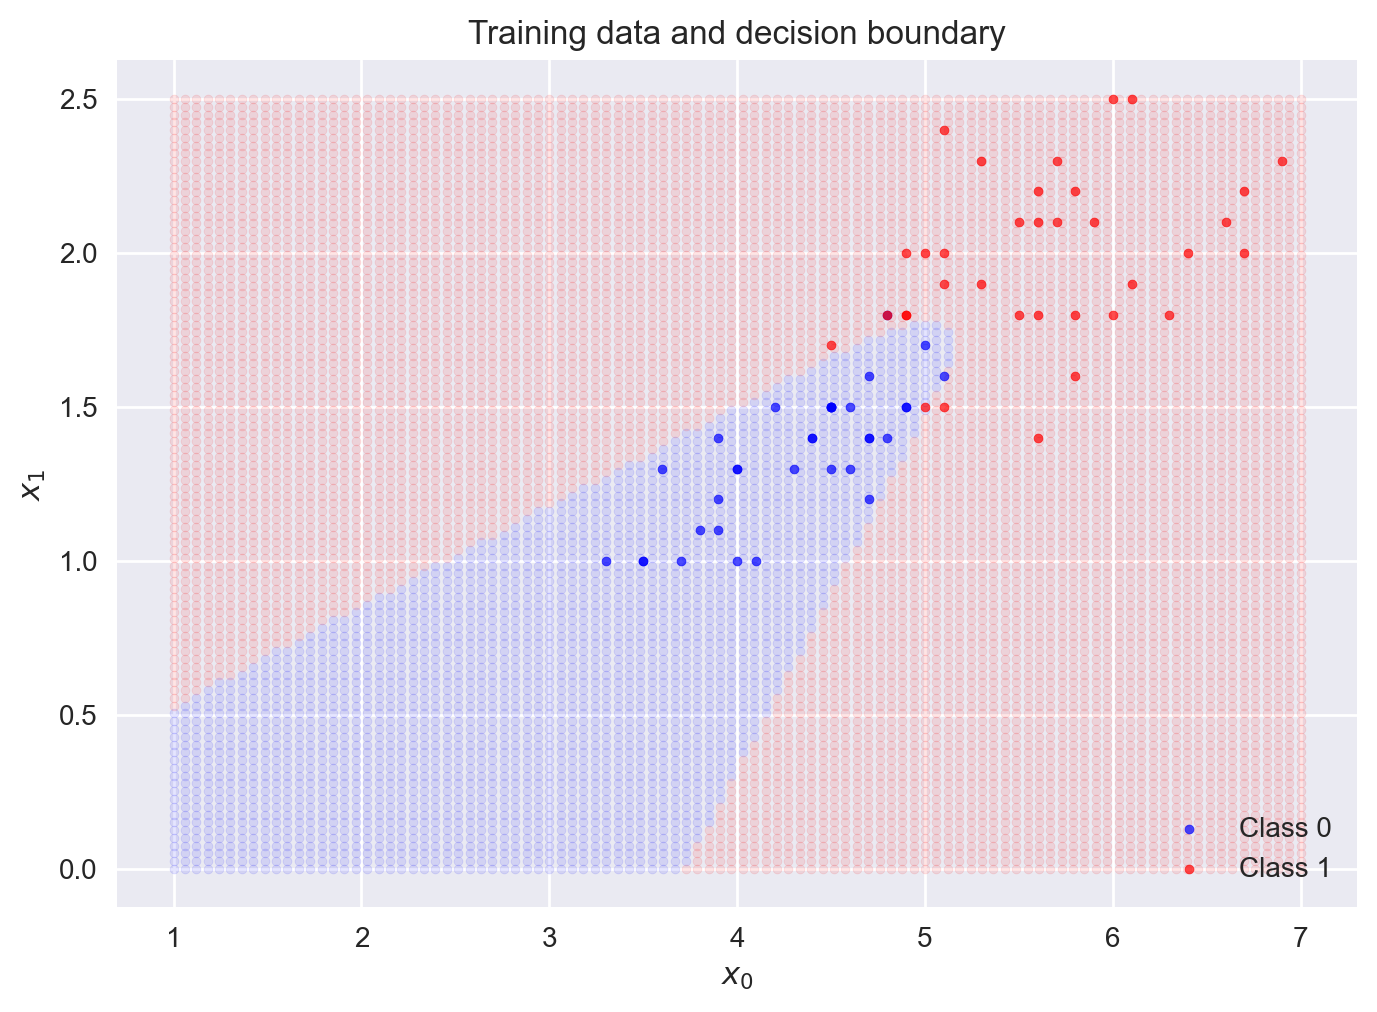

In [391]:
# Training data points and decision boundary. 
plt.scatter(X_decision[yhat_decision[:,0]==0, 0], 
            X_decision[yhat_decision[:,0]==0, 1], 
            marker='o', color='b', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==1, 0], 
            X_decision[yhat_decision[:,0]==1, 1], 
            marker='o', color='r', alpha=0.1, s=10)

plt.scatter(X_train[Y_train[:,0]==0, 0], 
            X_train[Y_train[:,0]==0, 1], 
            marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_train[Y_train[:,0]==1, 0], 
            X_train[Y_train[:,0]==1, 1], 
            marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Training data and decision boundary')

plt.legend(loc='lower right', fontsize=10)

In [392]:
# Calculate the train error.
f_train = sigmoid(X_train.dot(W1)+b1.T).dot(W2)+b2.T  # Shape: [n,1].
yhat_train = np.ones_like(f_train)
yhat_train[f_train<0] = 0
train_error = 1 - np.sum(yhat_train == Y_train) / Y_train.shape[0]
print('Train error: {}'.format(train_error))

Train error: 0.02857142857142858


#### Results on Test Data

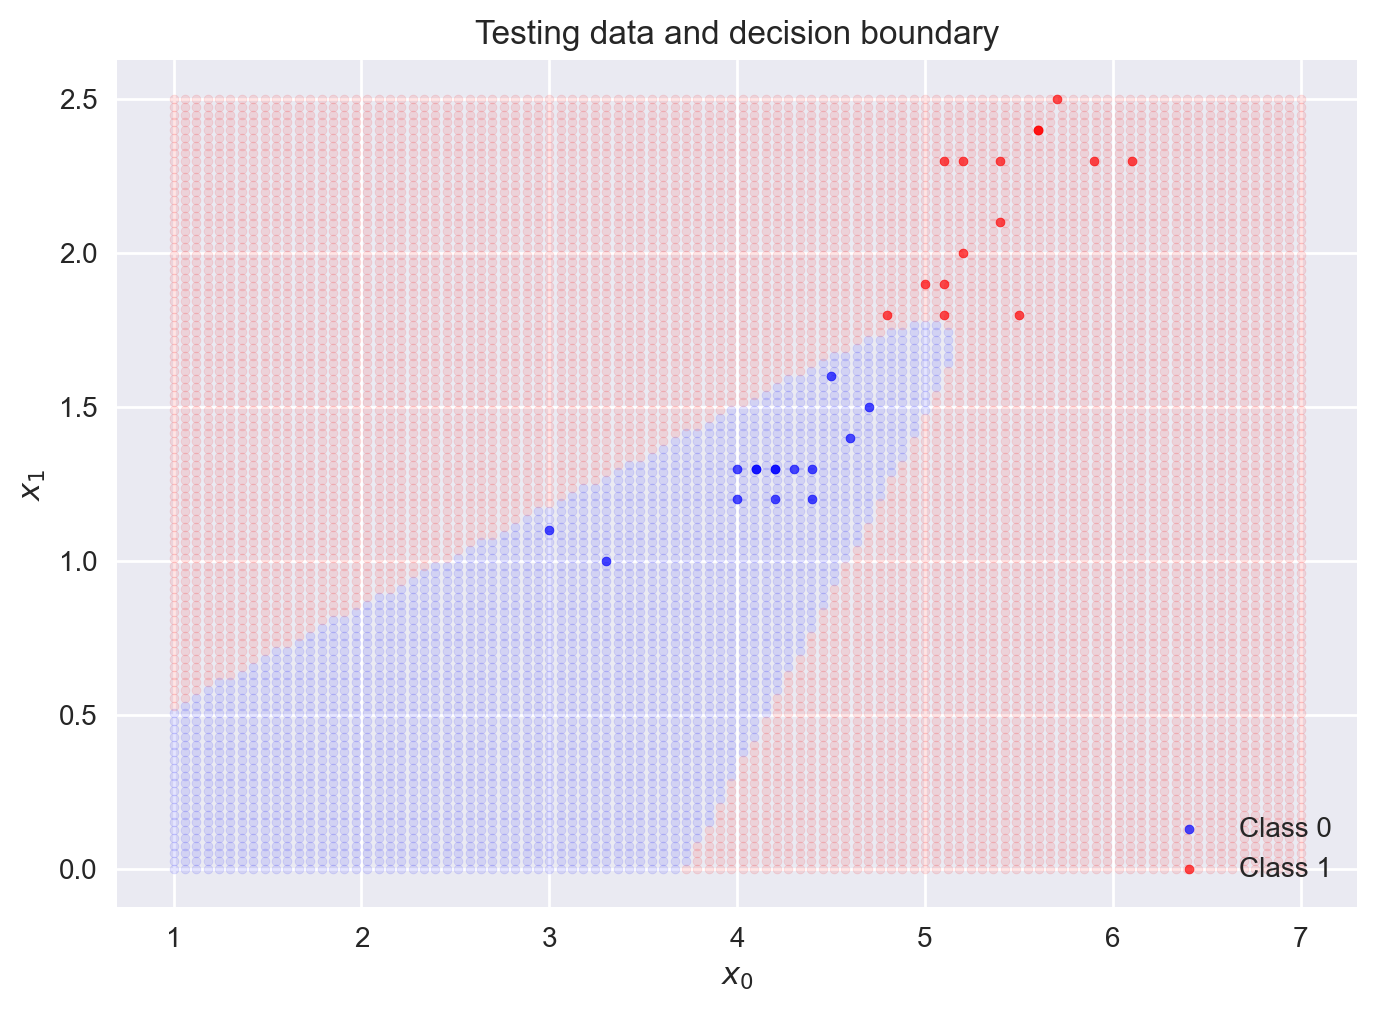

In [396]:
# Test data points and decision boundary. 
plt.scatter(X_decision[yhat_decision[:,0]==0, 0], 
            X_decision[yhat_decision[:,0]==0, 1], 
            marker='o', color='b', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==1, 0], 
            X_decision[yhat_decision[:,0]==1, 1], 
            marker='o', color='r', alpha=0.1, s=10)

plt.scatter(X_test[Y_test[:,0]==0, 0], 
            X_test[Y_test[:,0]==0, 1], 
            marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_test[Y_test[:,0]==1, 0], 
            X_test[Y_test[:,0]==1, 1], 
            marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Testing data and decision boundary')

plt.legend(loc='lower right', fontsize=10)

In [394]:
# Calculate the test error.
f_test = sigmoid(X_test.dot(W1)+b1.T).dot(W2)+b2.T  # Shape: [n,1].
yhat_test = np.ones_like(f_test)
yhat_test[f_test<0] = 0
test_error = 1 - np.sum(yhat_test == Y_test) / Y_test.shape[0]
print('Test error: {}'.format(test_error))

Test error: 0.0


### Adding K-Fold Cross Validation

In [228]:
from sklearn.model_selection import KFold

# break the data into 5 fold, and shuffle the data, use state 0 for reproducibility.
five_fold_0 = KFold(n_splits=5, shuffle=True, random_state=0)

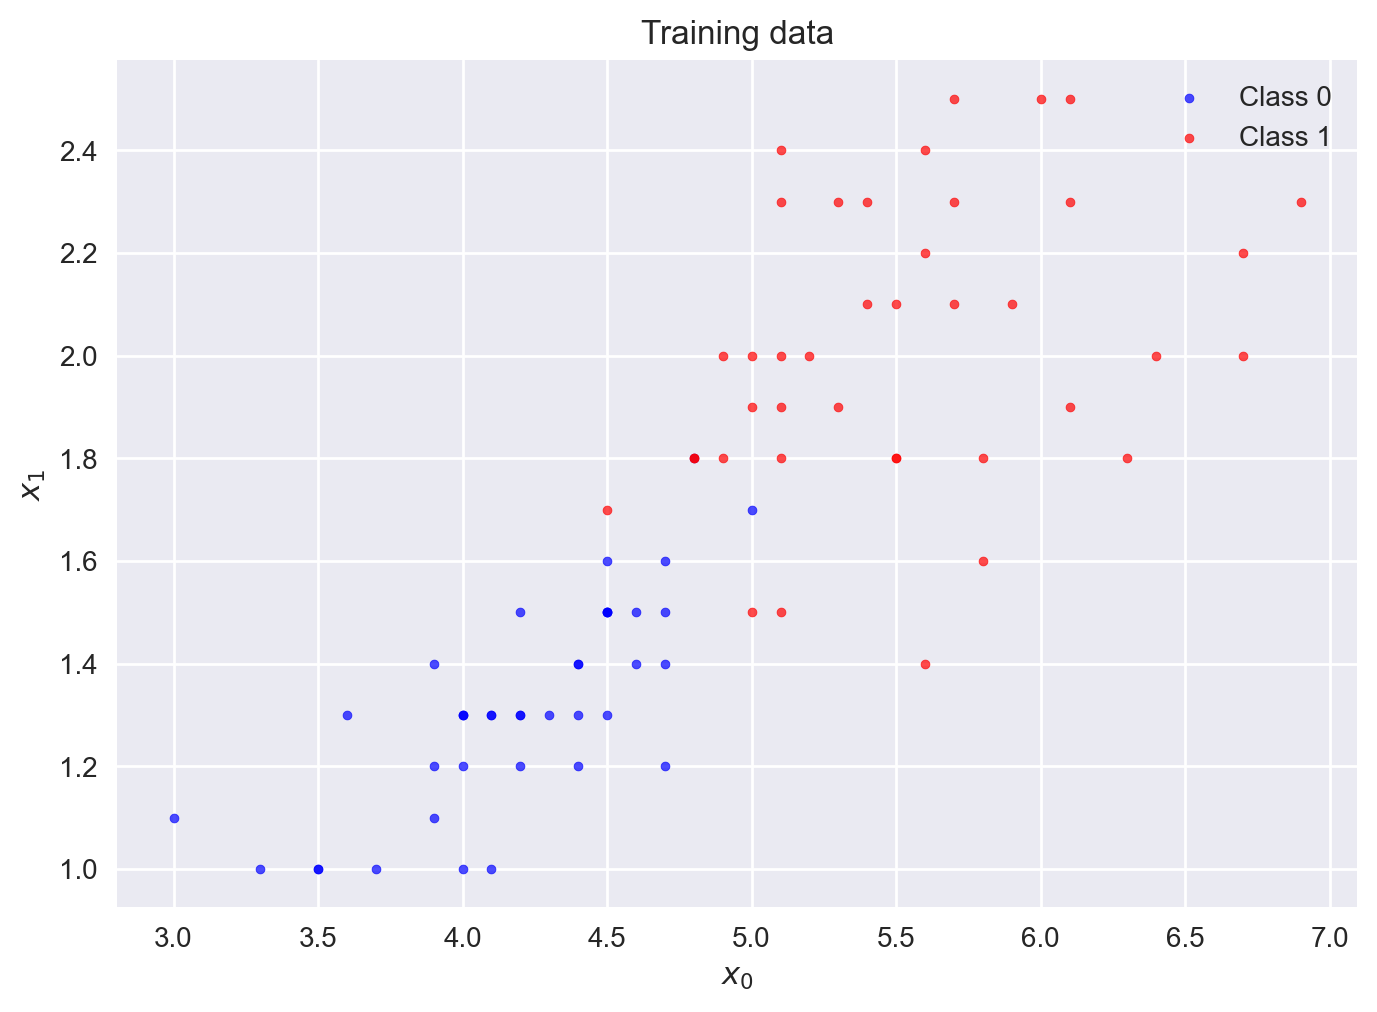

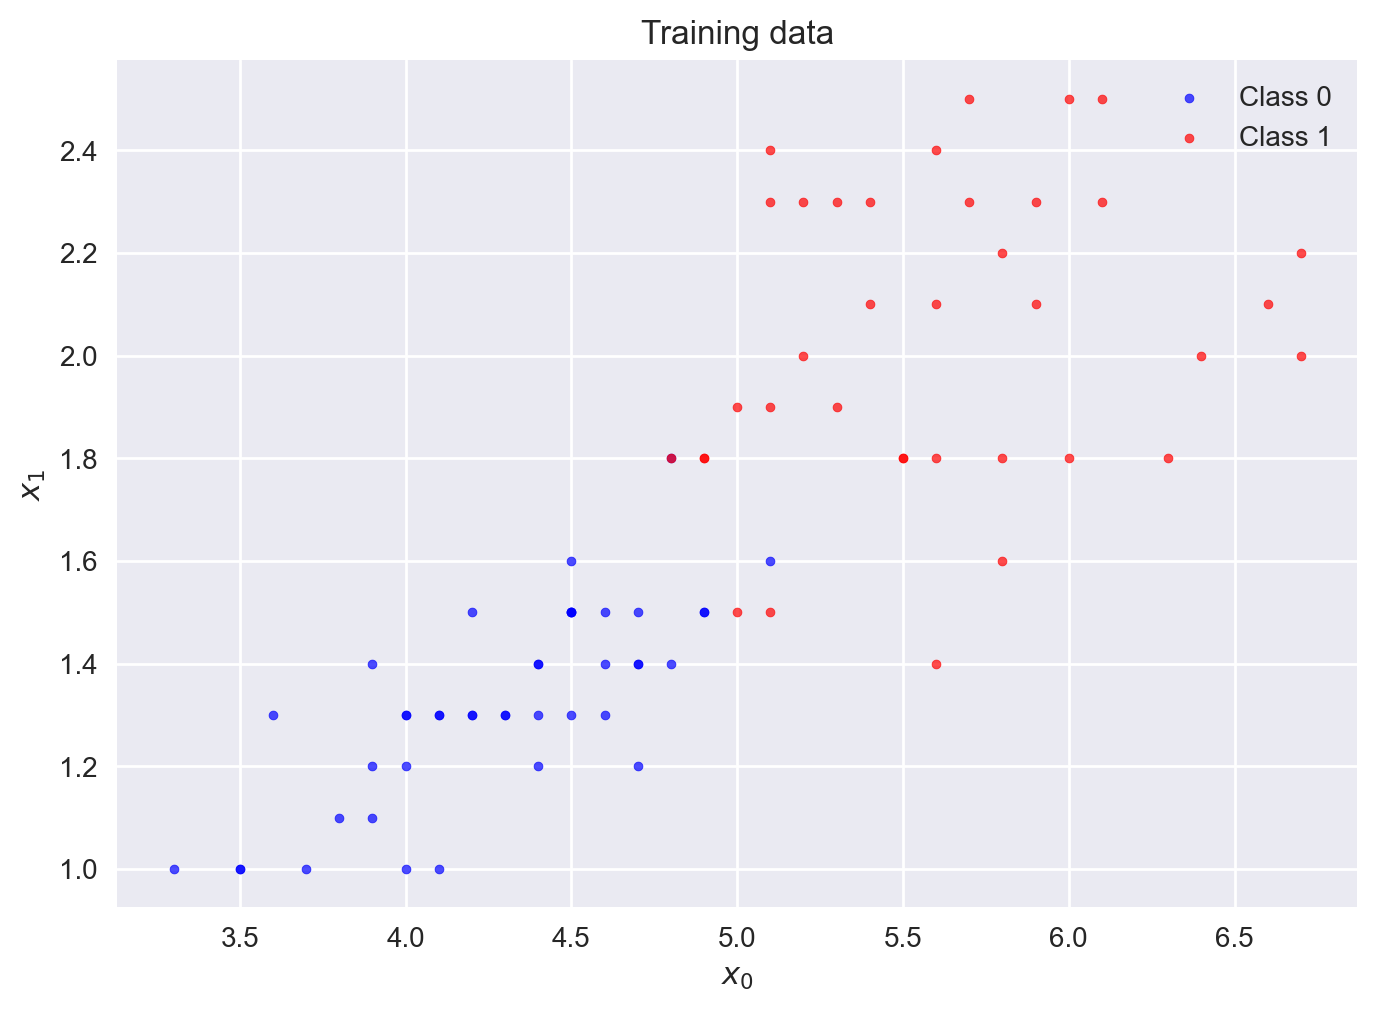

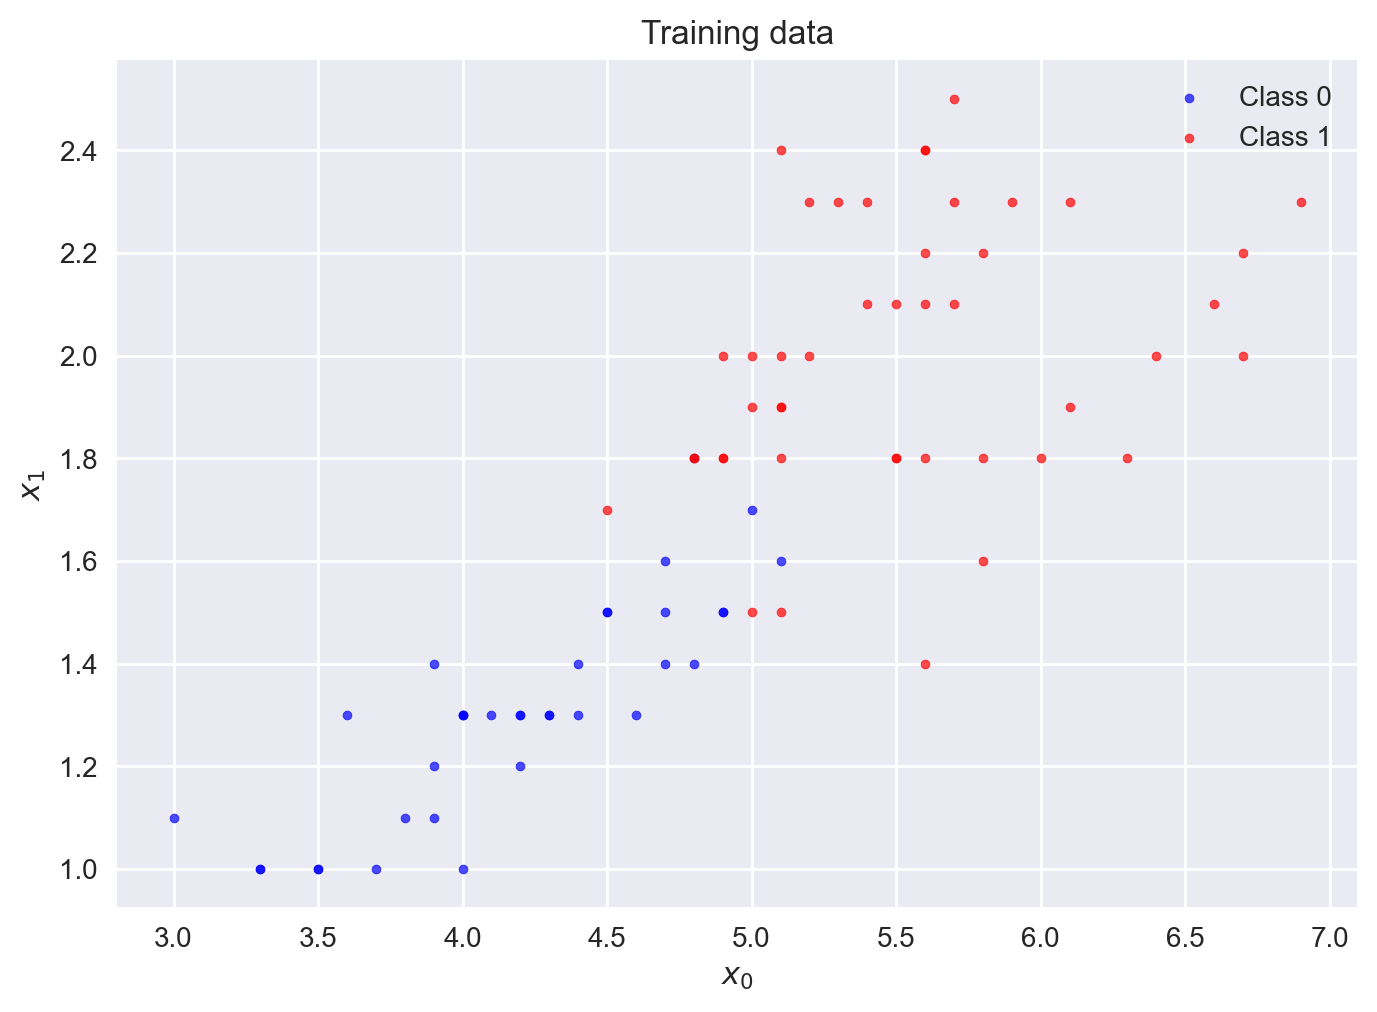

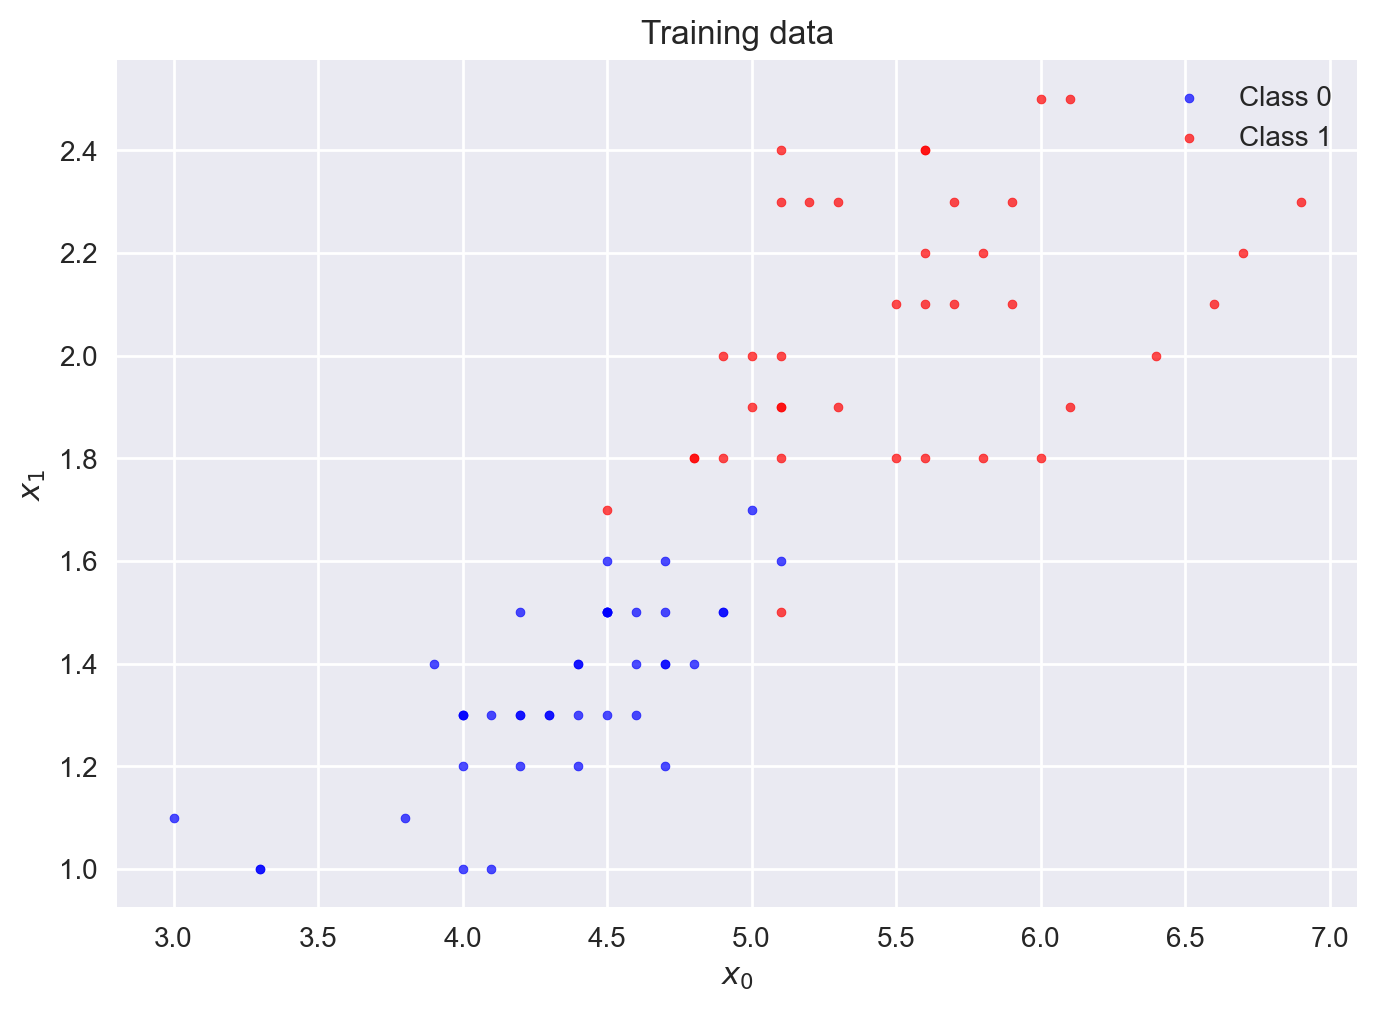

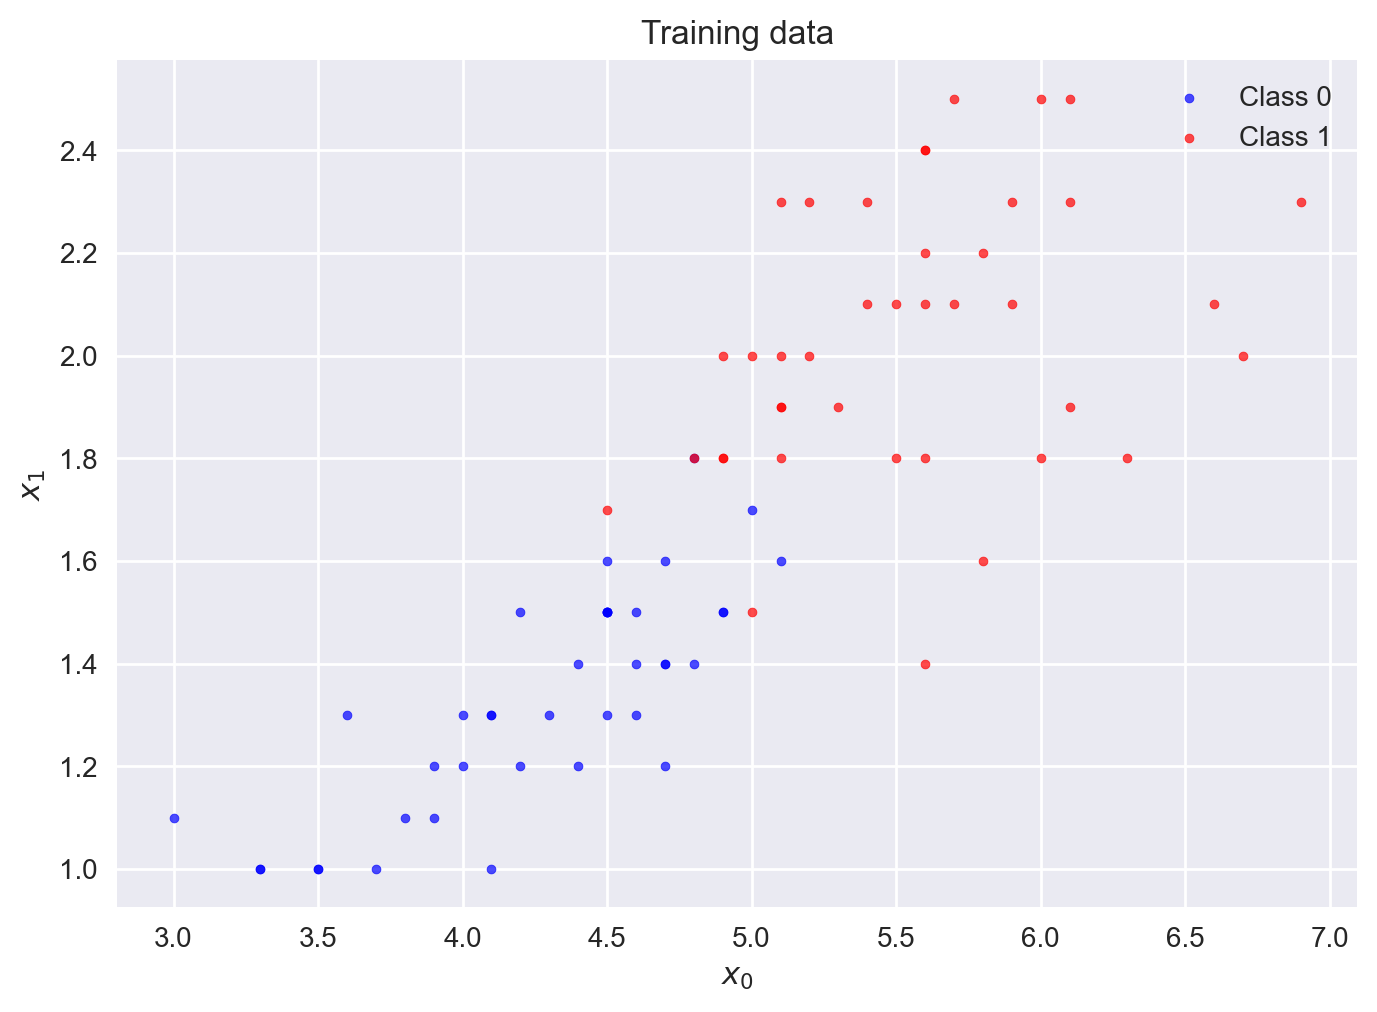

In [229]:
# using 5-fold from sklearn to generate train and test set indices
for train, test in five_fold_0.split(new_X):
    # array indexing the train and test set
    X_train, Y_train, X_test, Y_test = new_X[train], new_Y[train], new_X[test], new_Y[test]
    
    # Visualization of the training data.
    plt.style.use("seaborn-v0_8")

    fig = plt.figure()
    plt.scatter(X_train[Y_train[:,0]==0, 0], 
                X_train[Y_train[:,0]==0, 1], 
                marker='o', color='b', alpha=0.7, s=10, label='Class 0')
    plt.scatter(X_train[Y_train[:,0]==+1, 0], 
                X_train[Y_train[:,0]==+1, 1], 
                marker='o', color='r', alpha=0.7, s=10, label='Class 1')

    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.legend(loc='upper right', fontsize=10)
    plt.title('Training data')
    plt.show()
    


In [230]:
# using 5-fold from sklearn to generate train and test set indices
for train, test in five_fold_0.split(new_X):
    # array indexing the train and test set
    X_train, Y_train, X_test, Y_test = new_X[train], new_Y[train], new_X[test], new_Y[test]
    ## The following codes might take a while to run, please be patient
